# Gradient Decent

In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from utils.lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from utils.plt_quad_logistic import plt_quad_logistic, plt_prob

## Dataset

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

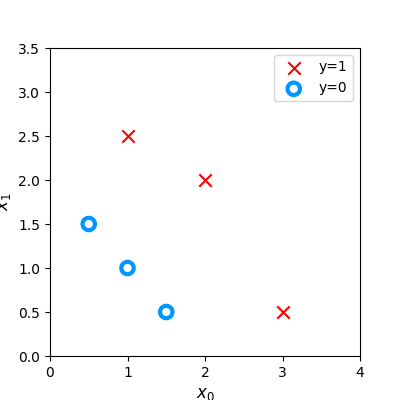

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Logistic Gradient Decent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

In [16]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0

    for i in range(m):
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        dj_db = dj_db + err_i

        # For Loop implementation
        # for j in range(n):
        #     dj_dw[j] += err_i * X[i, j]

        # Vectorized implementation
        dj_dw += err_i * X[i]

    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_db, dj_dw
        
        

In [17]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

In [18]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

                # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}  {w}:{dj_dw}  {b}:{dj_db}")
        
    return w, b, J_history         #return final w,b and J history for graphing
        

In [19]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574  [0.03 0.02]:[-0.25 -0.17]  0.0:0.0
Iteration 1000: Cost 0.1590977666870457  [2.31 2.08]:[-0.01 -0.01]  -5.910993301906599:0.032949222839141055
Iteration 2000: Cost 0.08460064176930078  [3.16 2.94]:[-0.01 -0.01]  -8.311492289992747:0.017942244884627107
Iteration 3000: Cost 0.05705327279402531  [3.68 3.47]:[-0. -0.]  -9.782304238535813:0.012196841028667074
Iteration 4000: Cost 0.04290759421682  [4.06 3.85]:[-0. -0.]  -10.83864078095771:0.009207554143016322
Iteration 5000: Cost 0.03433847729884557  [4.36 4.15]:[-0. -0.]  -11.661537885653816:0.007384402387187493
Iteration 6000: Cost 0.02860379802212006  [4.6  4.39]:[-0. -0.]  -12.334999960928222:0.0061593280452405695
Iteration 7000: Cost 0.02450156960879306  [4.8 4.6]:[-0. -0.]  -12.904720255835345:0.005280640697085784
Iteration 8000: Cost 0.02142370332569295  [4.98 4.78]:[-0. -0.]  -13.398265876886166:0.004620136439472754
Iteration 9000: Cost 0.019030137124109114  [5.14 4.94]:[-0. -0.]  -13.83353046

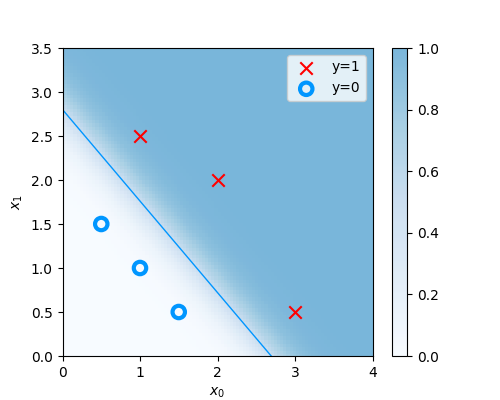

In [20]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

## Vectorization vs For Loops

In [11]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

import time 

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print(f'Dot: {1000 * (toc-tic)} ms')

c = 0 
tic = time.time()
for i in range(1000000):
    c += a[i] * b[i]
toc = time.time()

print(f'For: {1000 * (toc - tic)} ms')


Dot: 0.8516311645507812 ms
For: 159.41858291625977 ms


In [62]:
w = np.zeros_like(X_train[0])
w_v = w.reshape(-1, 1)
w_t = w_v.T
print(w_v, w_t)


[[0.]
 [0.]] [[0. 0.]]


In [110]:
def compute_gradient_logistic_vectorized(X, y, w, b):
    """
    Computes the gradient for logistic regression.
    
    Args:
      X (ndarray, shape (m,n)): Data, m examples with n features
      y (ndarray, shape (m,)): target values
      w (ndarray, shape (n,)): model parameters  
      b (scalar): model parameter
      
    Returns:
      dj_dw (ndarray, shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape

    # Compute the model output: shape (m,)
    Z = np.dot(X, w) + b
    A = sigmoid(Z)  # Ensure sigmoid is defined and returns a 1D array of shape (m,)

    # Compute error: shape (m,)
    err = A - y  # Both A and y are shape (m,)

    # Compute gradients:
    dj_db = np.sum(err) / m
    dj_dw = np.dot(X.T, err) / m  # shape (n,)

    return dj_db, dj_dw


In [111]:
def gradient_descent_vectorized(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic_vectorized(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

                # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}  {w}:{dj_dw}  {b}:{dj_db}")
        
    return w, b, J_history         #return final w,b and J history for graphing
        

In [112]:
w_tmp  = np.zeros_like(X_train[0])
# w_tmp_v = w_tmp.reshape(-1, 1)
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_vectorized(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574  [0.03 0.02]:[-0.25 -0.17]  0.0:0.0
Iteration 1000: Cost 0.1590977666870457  [2.31 2.08]:[-0.01 -0.01]  -5.910993301906599:0.032949222839141055
Iteration 2000: Cost 0.08460064176930078  [3.16 2.94]:[-0.01 -0.01]  -8.311492289992747:0.017942244884627107
Iteration 3000: Cost 0.05705327279402531  [3.68 3.47]:[-0. -0.]  -9.782304238535813:0.012196841028667074
Iteration 4000: Cost 0.04290759421682  [4.06 3.85]:[-0. -0.]  -10.83864078095771:0.009207554143016322
Iteration 5000: Cost 0.03433847729884557  [4.36 4.15]:[-0. -0.]  -11.661537885653816:0.007384402387187493
Iteration 6000: Cost 0.02860379802212006  [4.6  4.39]:[-0. -0.]  -12.334999960928222:0.0061593280452405695
Iteration 7000: Cost 0.02450156960879306  [4.8 4.6]:[-0. -0.]  -12.904720255835345:0.005280640697085784
Iteration 8000: Cost 0.02142370332569295  [4.98 4.78]:[-0. -0.]  -13.398265876886166:0.004620136439472754
Iteration 9000: Cost 0.019030137124109114  [5.14 4.94]:[-0. -0.]  -13.83353046

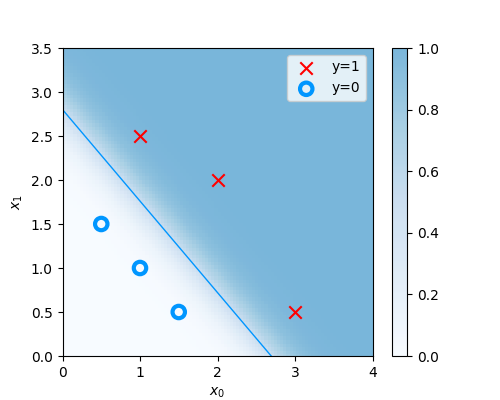

In [113]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()